In [1]:
# Import our dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sklearn as skl
import tensorflow as tf
import numpy as np

In [2]:
# Load the CSV file into a Pandas DataFrame
prep_df = pd.read_csv('resources/sql-resources/song_attributes.csv')

# Display the DataFrame
prep_df

,index,is_playable,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,...,mode_major,speechiness_mixed,speechiness_non_speech,speechiness_speech,instrumentalness_above_5,instrumentalness_below_5,is_live,is_not_live,time_signature_4_4,time_signature_other
0,1,1,0.595,0.432,2.0,-9.488,0.0422,0.601000,0.0000,0.0899,...,1,0,1,0,0,1,0,1,1,0
1,2,1,0.807,0.707,5.0,-4.759,0.0319,0.069600,0.0033,0.3100,...,1,0,1,0,0,1,0,1,1,0
2,3,1,0.597,0.814,6.0,-7.531,0.0475,0.000751,0.8570,0.1050,...,0,0,1,0,1,0,0,1,1,0
3,4,1,0.757,0.913,7.0,-7.542,0.0483,0.003330,0.8530,0.1330,...,1,0,1,0,1,0,0,1,1,0
4,5,1,0.641,0.758,1.0,-5.040,0.0460,0.102000,0.0000,0.3370,...,1,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211723,211724,1,0.678,0.380,6.0,-19.637,0.0492,0.724000,0.9110,0.1410,...,1,0,1,0,1,0,0,1,1,0
211724,211725,1,0.624,0.543,6.0,-19.371,0.0531,0.665000,0.8830,0.1840,...,1,0,1,0,1,0,0,1,1,0
211725,211726,1,0.682,0.508,1.0,-19.384,0.0401,0.800000,0.9850,0.1150,...,1,0,1,0,1,0,0,1,1,0
211726,211727,1,0.621,0.473,11.0,-19.373,0.0288,0.758000,0.9460,0.0970,...,1,0,1,0,1,0,0,1,1,0


In [3]:
# Split our preprocessed data into our features and target arrays
y = prep_df["danceability"]
X = prep_df.drop(["danceability"], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Remove non-numeric columns from X_train and X_test
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train_numeric)

# Scale the data
X_train_scaled = X_scaler.transform(X_train_numeric)
X_test_scaled = X_scaler.transform(X_test_numeric)

# Convert the scaled data back to DataFrame for easy handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_numeric.columns)

print("\nFirst few rows of scaled X_train:")
print(X_train_scaled_df.head())
print("\nFirst few rows of scaled X_test:")
print(X_test_scaled_df.head())


First few rows of scaled X_train:
      index  is_playable    energy       key  loudness  speechiness  \
0  0.784133          0.0 -1.269651  0.493363 -0.889008    -0.356590   
1  0.086670          0.0  0.362768  0.773947  0.697159    -0.181299   
2  1.191659          0.0  0.344985 -0.348391  0.565684     0.023050   
3 -1.242241          0.0 -0.579696 -0.067807  0.092168    -0.246916   
4 -0.416525          0.0 -0.152920 -0.909561  0.471418    -0.471888   

   acousticness  instrumentalness  liveness   valence  ...  mode_major  \
0      1.501880          1.739355 -0.673026  0.206489  ...   -1.316617   
1     -0.709249         -0.684142 -0.527763  0.560661  ...    0.759523   
2      0.849775          0.779502 -0.100152  0.688766  ...   -1.316617   
3      0.545642         -0.684121 -0.657305  0.854549  ...   -1.316617   
4     -0.596912         -0.667968  0.440651 -0.554605  ...   -1.316617   

   speechiness_mixed  speechiness_non_speech  speechiness_speech  \
0          -0.188862     

In [4]:
# Define the model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 32
hidden_nodes_layer3 = 16

nn = tf.keras.models.Sequential()

## First Test

In [5]:
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="elu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="swish"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()

C:\Users\gonzh\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,473 (5.75 KB)

 Trainable params: 1,473 (5.75 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [7]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 5s 679us/step - loss: 0.0433 - mse: 0.0433
Epoch 2/100
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 3s 674us/step - loss: 0.0157 - mse: 0.0157
Epoch 3/100
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 3s 673us/step - loss: 0.0149 - mse: 0.0149
Epoch 4/100
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 3s 681us/step - loss: 0.0143 - mse: 0.0143
Epoch 5/100
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 4s 765us/step - loss: 0.0140 - mse: 0.0140
Epoch 6/100
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 3s 695us/step - loss: 0.0138 - mse: 0.0138
Epoch 7/100
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 3s 676us/step - loss: 0.0138 - mse: 0.0138
Epoch 8/100
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 4s 729us/step - loss: 0.0137 - mse: 0.0137
Epoch 9/100
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 4s 741us/step - loss: 0.0136 - mse: 0.0136
Epoch 10/100
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 3s 688us/step - loss: 0.0135 - mse: 0.0135
Epoch 11/100
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 3s 663us/step - loss: 0.0134 - mse: 0.0134
Epoch 12/100
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 3s 664us

In [8]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, MSE: {model_accuracy}")

1655/1655 - 1s - 753us/step - loss: 0.0129 - mse: 0.0129
Loss: 0.01286027766764164, MSE: 0.01286027766764164


## Second Test

In [9]:
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="swish"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn.summary()

C:\Users\gonzh\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,030 (19.65 KB)

 Trainable params: 2,082 (8.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,948 (11.52 KB)

In [10]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adamax", metrics=["mse"])

In [11]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 7s 981us/step - loss: 0.0280 - mse: 0.0280
Epoch 2/50
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0124 - mse: 0.0124
Epoch 3/50
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 4/50
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0124 - mse: 0.0124
Epoch 5/50
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0124 - mse: 0.0124
Epoch 6/50
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0124 - mse: 0.0124
Epoch 7/50
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0125 - mse: 0.0125
Epoch 8/50
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0124 - mse: 0.0124
Epoch 9/50
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0124 - mse: 0.0124
Epoch 10/50
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0123 - mse: 0.0123
Epoch 11/50
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0124 - mse: 0.0124
Epoch 12/50
4963/4963 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0123 - mse: 0.0123

In [12]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, MSE: {model_accuracy}")

1655/1655 - 1s - 744us/step - loss: 0.0126 - mse: 0.0126
Loss: 0.0126031544059515, MSE: 0.0126031544059515


In [13]:
# Save the trained model
nn.save('model/song_popularity_model.h5')


1655/1655 - 1s - 708us/step - loss: 0.0126 - mse: 0.0126
Loss: 0.0126031544059515, MSE: 0.0126031544059515
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
R-squared: 0.6517918890335301


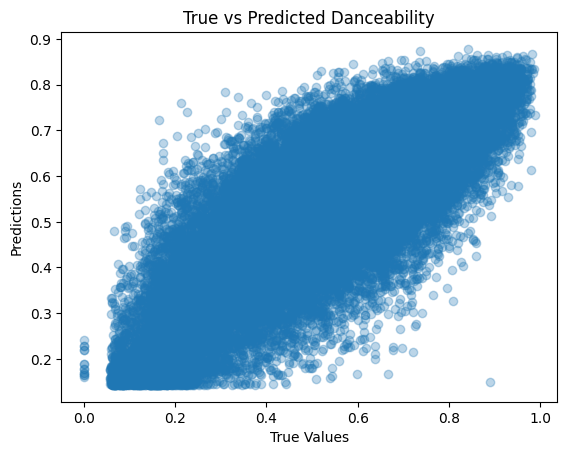

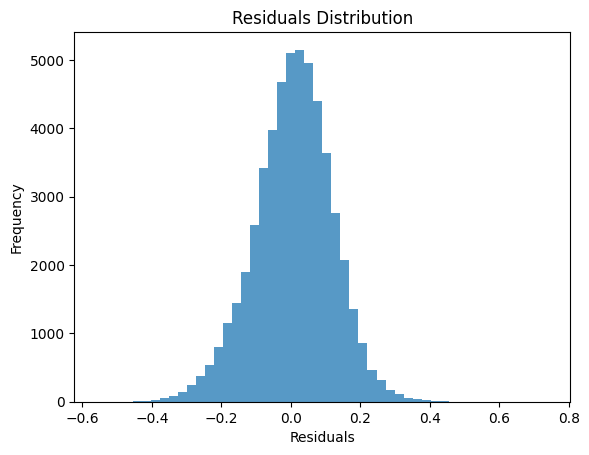

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Evaluate the model on the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, MSE: {model_accuracy}")

# Predict using the test data
y_pred = nn.predict(X_test_scaled)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Plot true vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Danceability')
plt.show()

# Residual Analysis
residuals = y_test - y_pred.flatten()
plt.hist(residuals, bins=50, alpha=0.75)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

In [15]:
# Import necessary libraries
from sklearn.metrics import r2_score, accuracy_score

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, MSE: {model_accuracy}")

# Predict using the test data
y_pred = nn.predict(X_test_scaled)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Check if R-squared meets the threshold
if r2 >= 0.80:
    print("The model demonstrates meaningful predictive power with an R-squared of at least 0.80.")
else:
    print("The model does not meet the R-squared threshold of 0.80.")


1655/1655 - 1s - 659us/step - loss: 0.0126 - mse: 0.0126
Loss: 0.0126031544059515, MSE: 0.0126031544059515
1655/1655 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step
R-squared: 0.6517918890335301
The model does not meet the R-squared threshold of 0.80.


In [16]:
# Define a threshold to convert continuous values into binary classes
threshold = 0.5

# Convert true values and predictions to binary classes based on the threshold
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

# Calculate classification accuracy
classification_accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Classification Accuracy: {classification_accuracy}")

# Check if classification accuracy meets the threshold
if classification_accuracy >= 0.75:
    print("The model demonstrates meaningful predictive power with a classification accuracy of at least 75%.")
else:
    print("The model does not meet the classification accuracy threshold of 75%.")

Classification Accuracy: 0.8187674752512658
The model demonstrates meaningful predictive power with a classification accuracy of at least 75%.
